## Import libraries

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.1


## Retrieve the dataset

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
len(train_labels)

60000

In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Data processing

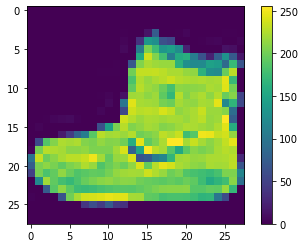

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
train_images = train_images / 255.0

test_images = test_images / 255.0

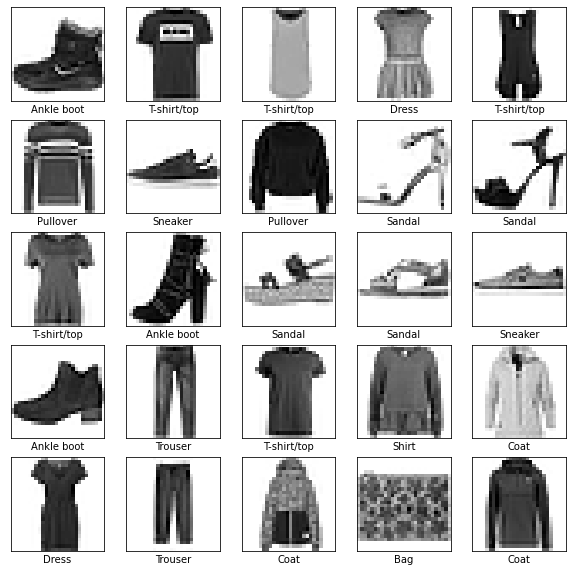

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build a model

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [39]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4984 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2801 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2692 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

## Evaluate the model

In [40]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3531 - accuracy: 0.8800 - 482ms/epoch - 2ms/step

Test accuracy: 0.8799999952316284


## Make some predictions

In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [43]:
predictions[0]

array([7.7167670e-08, 1.0484012e-10, 2.5408482e-09, 6.9505034e-11,
       8.7538501e-09, 1.9535790e-04, 5.4344827e-07, 2.9531384e-02,
       5.9744629e-08, 9.7027248e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [45]:
test_labels[0]

9

In [46]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

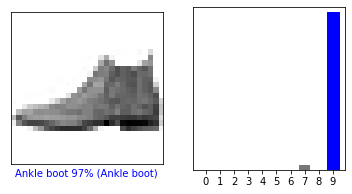

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

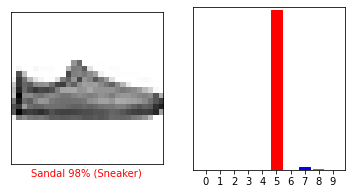

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

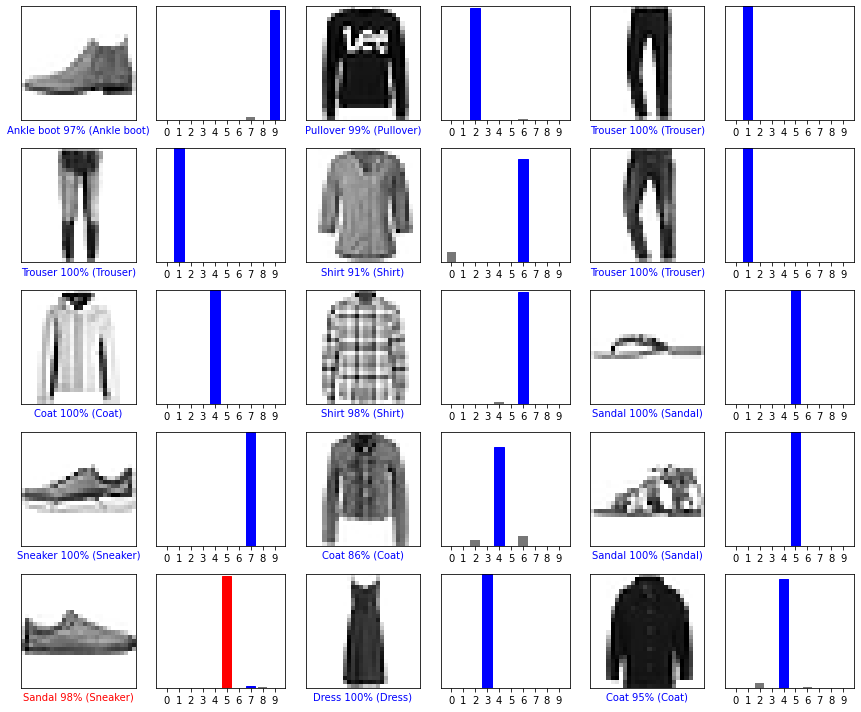

In [49]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [50]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [51]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [52]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[4.7252262e-05 1.8991830e-13 9.8711419e-01 1.7185364e-09 3.0194113e-03
  1.0034664e-15 9.8191267e-03 4.3103038e-19 6.2305133e-11 8.9033625e-14]]


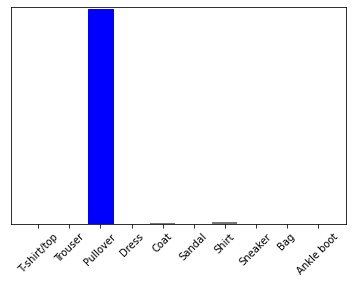

In [53]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [54]:
np.argmax(predictions_single[0])

2